# Demand Forecasting Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_excel(r"C:\Users\Admin\Downloads\manufacturing_defect_dataset.xlsx")

In [4]:
# Display first few rows
print(df.head())

   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           8.630515      0.081322           85.042379                0   
1       

In [5]:
# Checking for missing values
print(df.isnull().sum())

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


In [6]:
# Summary Statistics
print(df.describe())

       ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
count       3240.000000     3240.000000      3240.000000    3240.000000   
mean         548.523148    12423.018476        89.833290       2.558951   
std          262.402073     4308.051904         5.759143       1.705804   
min          100.000000     5000.174521        80.004820       0.000000   
25%          322.000000     8728.829280        84.869219       1.000000   
50%          549.000000    12405.204656        89.704861       3.000000   
75%          775.250000    16124.462428        94.789936       4.000000   
max          999.000000    19993.365549        99.989214       5.000000   

        DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
count  3240.000000   3240.000000       3240.000000         3240.000000   
mean      2.749116     80.134272         11.476543            2.501373   
std       1.310154     11.611750          6.872684            1.443684   
min       0.500710     60.01

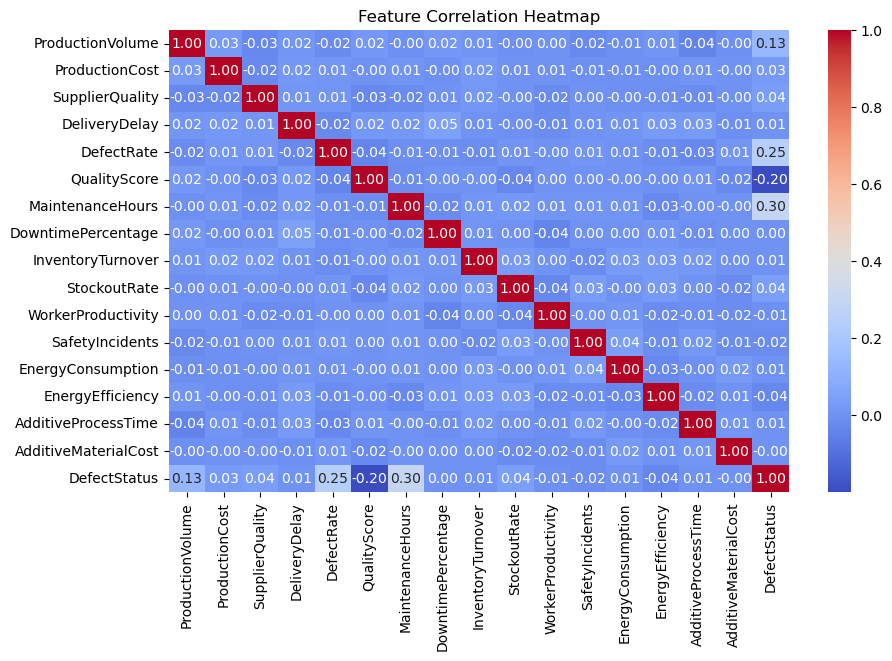

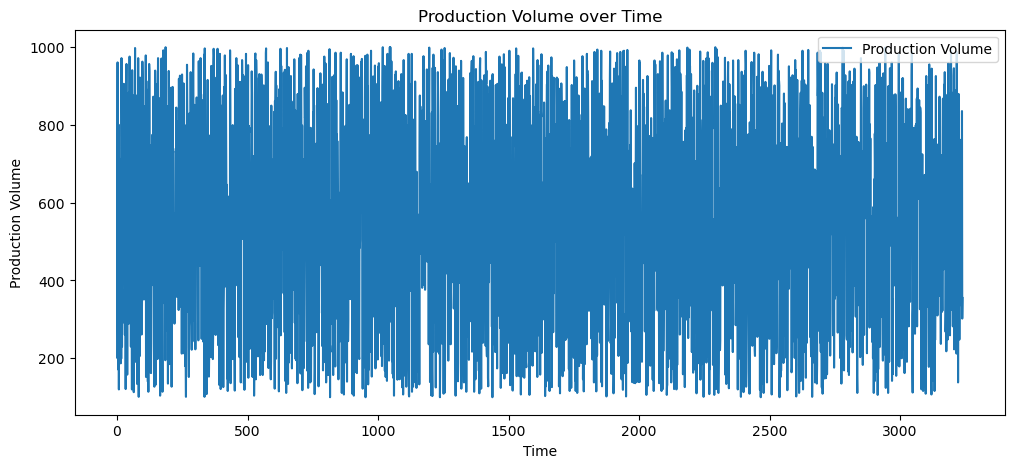

In [7]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Vizualizing trends in the Production Volume
plt.figure(figsize=(12,5))
plt.plot(df['ProductionVolume'], label="Production Volume")
plt.xlabel("Time")
plt.ylabel("Production Volume")
plt.title("Production Volume over Time")
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features relevant for preprocessing
features = ["ProductionCost", "InventoryTurnover", "StockoutRate", "DeliveryDelay",
            "SupplierQuality", "DefectRate", "QualityScore", "WorkerProductivity",
            "DowntimePercentage", "EnergyConsumption"]
#Independent Variables
X = df[features]

#Target variable
y = df["ProductionVolume"]

# 80-20 train and test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 242.24
Root Mean Squared Error (RMSE): 282.47


In [15]:
# Create a sample input for prediction
future_data = pd.DataFrame({
    "ProductionCost": [50000],
    "InventoryTurnover": [7],
    "StockoutRate": [0.1],
    "DeliveryDelay": [2],
    "SupplierQuality": [85],
    "DefectRate": [2.3],
    "QualityScore": [90],
    "WorkerProductivity": [75],
    "DowntimePercentage": [5],
    "EnergyConsumption": [1200]
})

# Scale the input data
future_data_scaled = scaler.transform(future_data)

# Predict demand
future_demand = model.predict(future_data_scaled)
print(f"Predicted Production Volume: {future_demand[0]:.2f}")

Predicted Production Volume: 428.41
